In [5]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas
import nsfg
import first
import analytic

import thinkstats2
import thinkplot

# Exponential distribution

In [6]:
def ReadBabyBoom(filename='babyboom.dat'):
    """Reads the babyboom data.

    filename: string

    returns: DataFrame
    """
    var_info = [
        ('time', 1, 8, int),
        ('sex', 9, 16, int),
        ('weight_g', 17, 24, int),
        ('minutes', 25, 32, int),
        ]
    columns = ['name', 'start', 'end', 'type']
    variables = pandas.DataFrame(var_info, columns=columns)
    variables.end += 1
    dct = thinkstats2.FixedWidthVariables(variables, index_base=1)

    df = dct.ReadFixedWidth(filename, skiprows=59)
    return df

In [8]:
# convert data to a df
df = ReadBabyBoom()
# difference between consecutive birth time
diffs = df.minutes.diff()
# distribution of the interarrival times
cdf = thinkstats2.Cdf(diffs, label='actual')

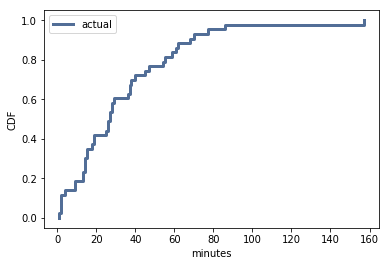

In [9]:
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='minutes', ylabel='CDF')

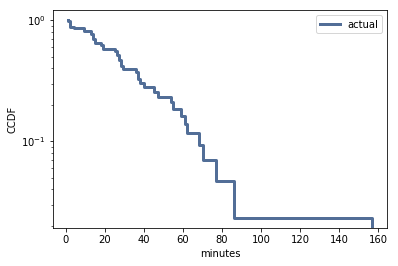

In [10]:
thinkplot.Cdf(cdf,complement=True)
thinkplot.Show(xlabel='minutes',
              ylabel='CCDF',
              yscale='log')

# Normal distribution

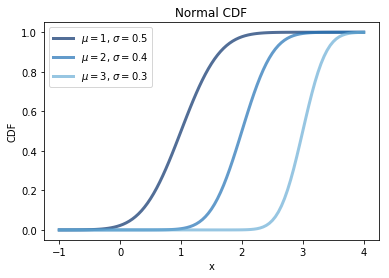

In [11]:
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, 
                                               low=-1.0, high=4.0)
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title='Normal CDF', xlabel='x', ylabel='CDF',
                 loc='upper left')

# Normal Probability Plot

In [12]:
def MakeNormalPlot(weights, term_weights):
    """Generates a normal probability plot of birth weights."""

    mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
    std = math.sqrt(var)

    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

    thinkplot.PrePlot(2) 
    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='all live')

    xs, ys = thinkstats2.NormalProbability(term_weights)
    thinkplot.Plot(xs, ys, label='full term')
    thinkplot.Save(root='analytic_birthwgt_normal',
                   title='Normal probability plot',
                   xlabel='Standard deviations from mean',
                   ylabel='Birth weight (lbs)')

# Exercises

In [18]:
# 5.1

import scipy.stats
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
dist.mean()

178.0

In [17]:
# define Blue Man Group requirements
high = dist.cdf(185.4)
low = dist.cdf(177.8)
low, high, high-low
# 34% of the population meets height requirements to be a memeber of BMG

(0.48963902786483265, 0.8317337108107857, 0.3420946829459531)